<a href="https://colab.research.google.com/github/i3rvn0/AluraStoreBR/blob/main/AluraStoreBr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importação dos dados



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [ ]:
faturamento_loja1 = loja['Preço'].sum()
faturamento_loja2 = loja2['Preço'].sum()
faturamento_loja3 = loja3['Preço'].sum()
faturamento_loja4 = loja4['Preço'].sum()

print(f"Faturamento total da loja 1: R$ {faturamento_loja1:,.2f}".replace(",", "X").replace(".", ",").replace("X", "."))
print(f"Faturamento total da loja 2: R$ {faturamento_loja2:,.2f}".replace(",", "X").replace(".", ",").replace("X", "."))
print(f"Faturamento total da loja 3: R$ {faturamento_loja3:,.2f}".replace(",", "X").replace(".", ",").replace("X", "."))
print(f"Faturamento total da loja 4: R$ {faturamento_loja4:,.2f}".replace(",", "X").replace(".", ",").replace("X", "."))

Faturamento total da loja 1: R$ 1.534.509,12
Faturamento total da loja 2: R$ 1.488.459,06
Faturamento total da loja 3: R$ 1.464.025,03
Faturamento total da loja 4: R$ 1.384.497,58


In [ ]:
faturamentos = {
    'Loja 1': faturamento_loja1,
    'Loja 2': faturamento_loja2,
    'Loja 3': faturamento_loja3,
    'Loja 4': faturamento_loja4
}

loja_maior_faturamento = max(faturamentos, key=faturamentos.get)
maior_faturamento = faturamentos[loja_maior_faturamento]

print(f"A loja com maior faturamento é: {loja_maior_faturamento} com faturamento de R$ {maior_faturamento:,.2f}".replace(",", "X").replace(".", ",").replace("X", "."))

loja_menor_faturamento = min(faturamentos, key=faturamentos.get)
menor_faturamento = faturamentos[loja_menor_faturamento]

print(f"A loja com menor faturamento é: {loja_menor_faturamento} com faturamento de R$ {menor_faturamento:,.2f}".replace(",", "X").replace(".", ",").replace("X", "."))


A loja com maior faturamento é: Loja 1 com faturamento de R$ 1.534.509,12
A loja com menor faturamento é: Loja 4 com faturamento de R$ 1.384.497,58


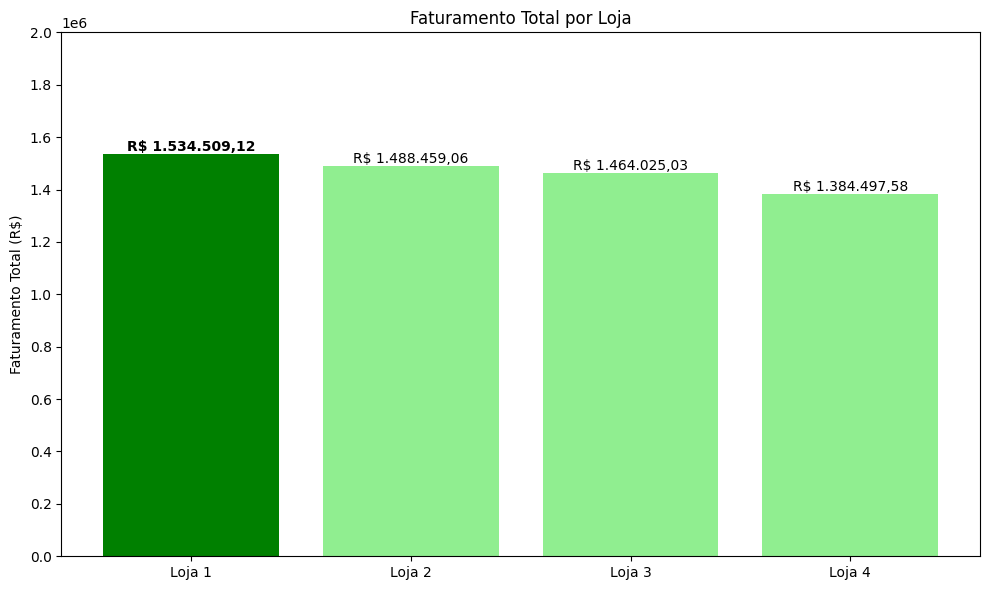

In [39]:
import matplotlib.pyplot as plt
import numpy as np

faturamentos = {
    'Loja 1': faturamento_loja1,
    'Loja 2': faturamento_loja2,
    'Loja 3': faturamento_loja3,
    'Loja 4': faturamento_loja4
}

lojas = list(faturamentos.keys())
valores = list(faturamentos.values())

# Determinando a legenda com maior faturamento
max_revenue_index = valores.index(max(valores))

# Padronizando a cor de destaque para o maior faturamento
colors = ['lightgreen'] * len(lojas)
colors[max_revenue_index] = 'green'


plt.figure(figsize=(10, 6))
bars = plt.bar(lojas, valores, color=colors)

plt.ylabel('Faturamento Total (R$)')
plt.title('Faturamento Total por Loja')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='', alpha=0.7)

# Estabelecendo limite y-axis e escala
plt.ylim(0, 2000000) # Limite y-max 2.0e6 (2.0 milhões)
plt.yticks(np.arange(0, 2000001, 200000)) # Escala de 0.2e6 (200.000 mil)


# Legenda no topo das barras
for i, bar in enumerate(bars):
    yval = bar.get_height()
    text = f'R$ {yval:,.2f}'.replace(",", "X").replace(".", ",").replace("X", ".")
    if i == max_revenue_index:
        plt.text(bar.get_x() + bar.get_width()/2, yval, text, va='bottom', ha='center', fontweight='bold')
    else:
        plt.text(bar.get_x() + bar.get_width()/2, yval, text, va='bottom', ha='center')


plt.tight_layout()
plt.show()

# 2. Vendas por Categoria


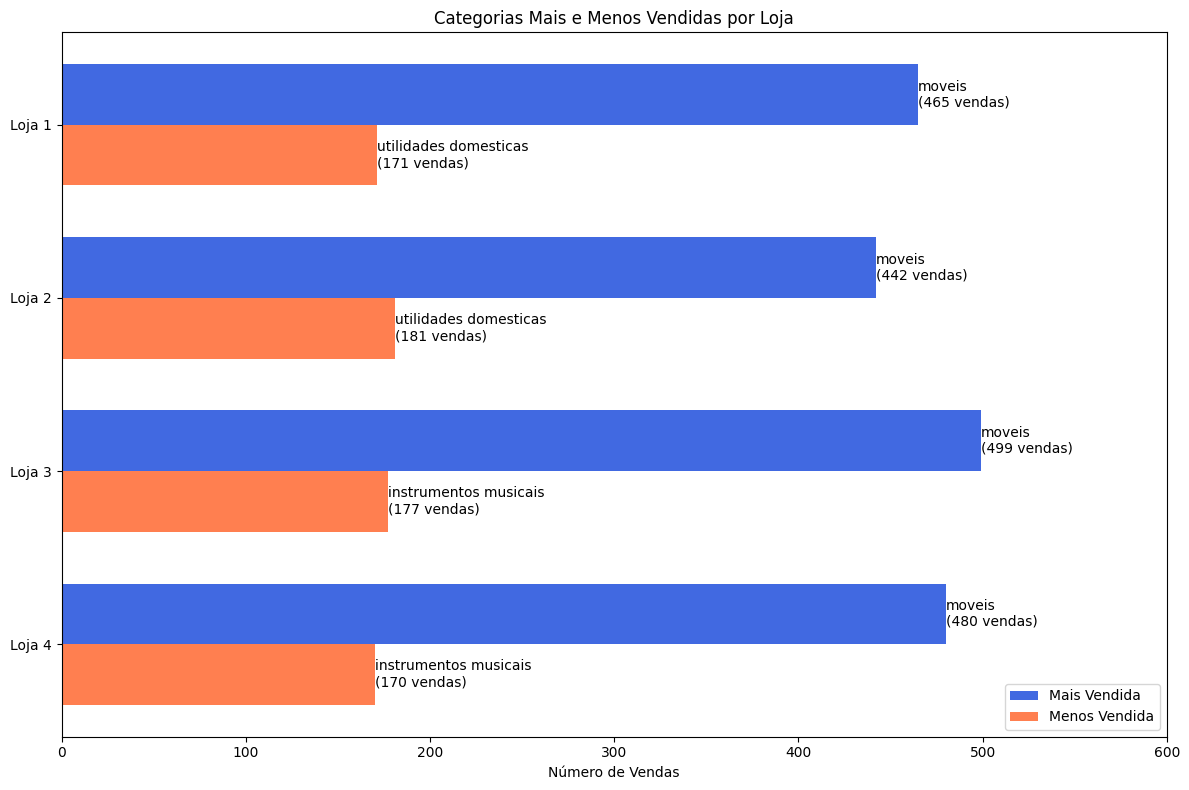

In [44]:
import matplotlib.pyplot as plt
import numpy as np

# Contagem da categoria mais e menos vendida de cada loja
loja1_counts = loja['Categoria do Produto'].value_counts()
loja2_counts = loja2['Categoria do Produto'].value_counts()
loja3_counts = loja3['Categoria do Produto'].value_counts()
loja4_counts = loja4['Categoria do Produto'].value_counts()

loja1_mais_vendida_count = loja1_counts.max()
loja1_menos_vendida_count = loja1_counts.min()

loja2_mais_vendida_count = loja2_counts.max()
loja2_menos_vendida_count = loja2_counts.min()

loja3_mais_vendida_count = loja3_counts.max()
loja3_menos_vendida_count = loja3_counts.min()

loja4_mais_vendida_count = loja4_counts.max()
loja4_menos_vendida_count = loja4_counts.min()

# Identificando as categorias mais e menos vendidas
categoria_mais_vendida_loja1 = loja1_counts.idxmax()
categoria_menos_vendida_loja1 = loja1_counts.idxmin()

categoria_mais_vendida_loja2 = loja2_counts.idxmax()
categoria_menos_vendida_loja2 = loja2_counts.idxmin()

categoria_mais_vendida_loja3 = loja3_counts.idxmax()
categoria_menos_vendida_loja3 = loja3_counts.idxmin()

categoria_mais_vendida_loja4 = loja4_counts.idxmax()
categoria_menos_vendida_loja4 = loja4_counts.idxmin()


lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
mais_vendidas_counts = [loja1_mais_vendida_count, loja2_mais_vendida_count, loja3_mais_vendida_count, loja4_mais_vendida_count]
menos_vendidas_counts = [loja1_menos_vendida_count, loja2_menos_vendida_count, loja3_menos_vendida_count, loja4_menos_vendida_count]
mais_vendidas_categories = [categoria_mais_vendida_loja1, categoria_mais_vendida_loja2, categoria_mais_vendida_loja3, categoria_mais_vendida_loja4]
menos_vendidas_categories = [categoria_menos_vendida_loja1, categoria_menos_vendida_loja2, categoria_menos_vendida_loja3, categoria_menos_vendida_loja4]

x = np.arange(len(lojas))
width = 0.35  # Espessura das barras

fig, ax = plt.subplots(figsize=(12, 8))
rects1 = ax.barh(x - width/2, mais_vendidas_counts, width, label='Mais Vendida', color='royalblue')
rects2 = ax.barh(x + width/2, menos_vendidas_counts, width, label='Menos Vendida', color='coral')

# Títulos e legendas dos eixos
ax.set_xlabel('Número de Vendas')
ax.set_title('Categorias Mais e Menos Vendidas por Loja')
ax.set_yticks(x)
ax.set_yticklabels(lojas)
ax.invert_yaxis()  # Apresentando Loja 1 no topo, seguindo ordem crescente
ax.legend()

# Legendas nas barras
def autolabel(rects, categories):
    for i, rect in enumerate(rects):
        width = rect.get_width()
        ax.text(width, rect.get_y() + rect.get_height()/2,
                f'{categories[i]}\n({width} vendas)',
                ha='left', va='center')

autolabel(rects1, mais_vendidas_categories)
autolabel(rects2, menos_vendidas_categories)


plt.xlim(0, 600) # Limite x-axis max de 600 para melhor visualizar a legenda
plt.grid(axis='x', linestyle='', alpha=0.7)
plt.tight_layout()
plt.show()

# 3. Média de Avaliação das Lojas

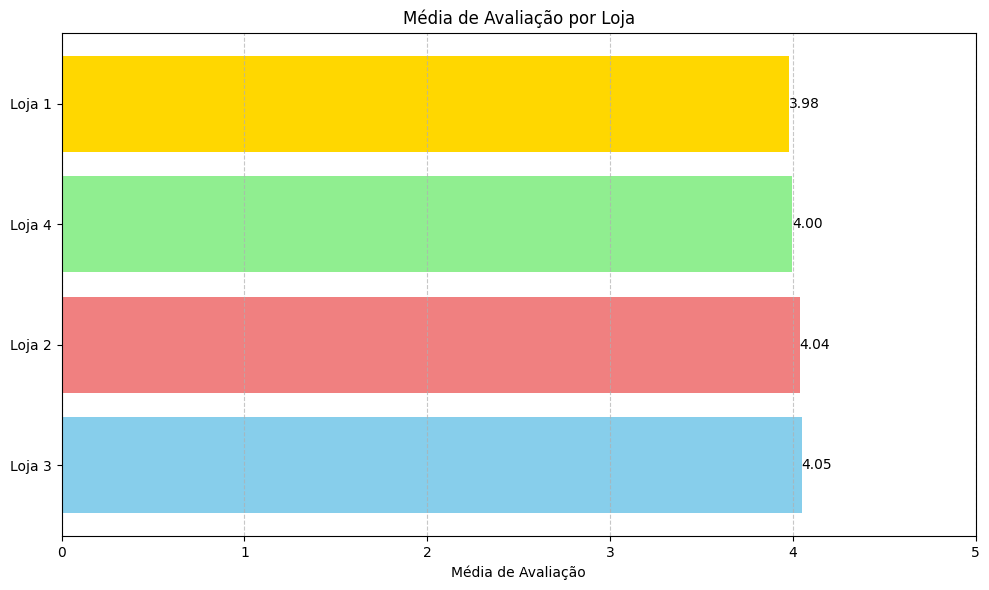

In [40]:
import matplotlib.pyplot as plt
import numpy as np

media_avaliacao_loja1 = loja['Avaliação da compra'].mean()
media_avaliacao_loja2 = loja2['Avaliação da compra'].mean()
media_avaliacao_loja3 = loja3['Avaliação da compra'].mean()
media_avaliacao_loja4 = loja4['Avaliação da compra'].mean()

media_avaliacoes = {
    'Loja 1': media_avaliacao_loja1,
    'Loja 2': media_avaliacao_loja2,
    'Loja 3': media_avaliacao_loja3,
    'Loja 4': media_avaliacao_loja4
}

lojas = list(media_avaliacoes.keys())
medias = list(media_avaliacoes.values())

# Ordenação em escala crescente
sorted_indices = np.argsort(medias)[::-1]
lojas_sorted = [lojas[i] for i in sorted_indices]
medias_sorted = [medias[i] for i in sorted_indices]

plt.figure(figsize=(10, 6))
bars = plt.barh(lojas_sorted, medias_sorted, color=['skyblue', 'lightcoral', 'lightgreen', 'gold'])

plt.xlabel('Média de Avaliação')
plt.title('Média de Avaliação por Loja')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Legenda das barras
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2, f'{width:.2f}', va='center', ha='left')

plt.xlim(0, 5) # Limite x-axis max de 5
plt.tight_layout()
plt.show()

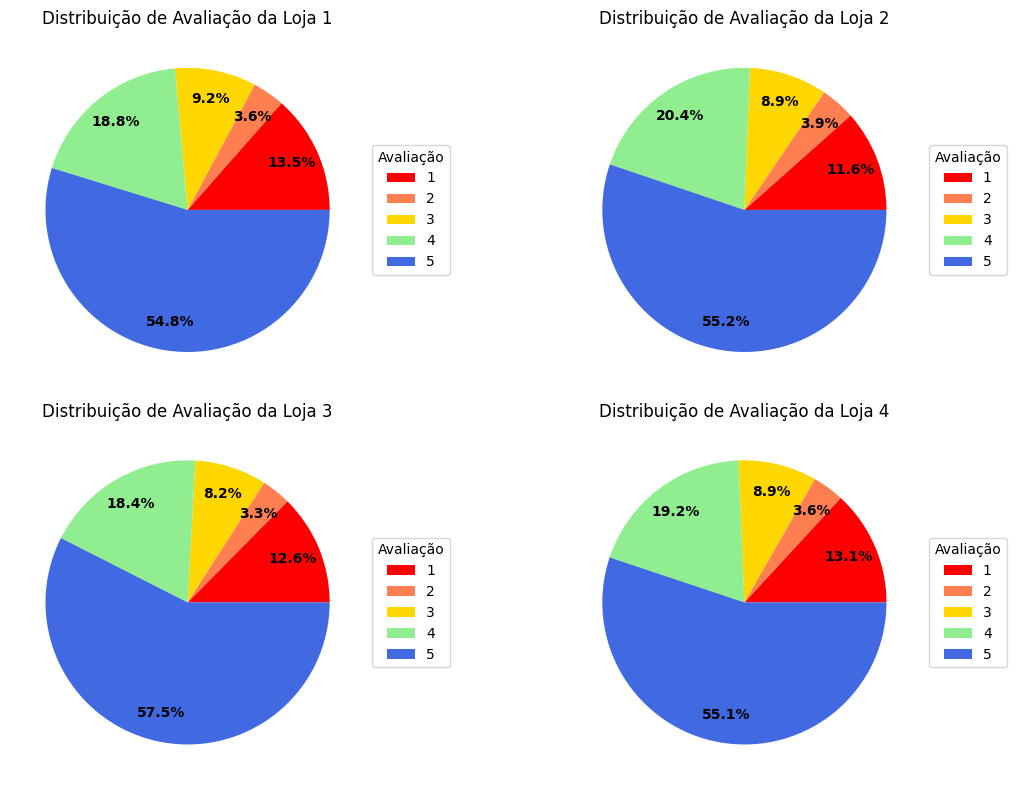

In [48]:
colors = ['red', 'coral', 'gold', 'lightgreen', 'royalblue']
labels = ['1', '2', '3', '4', '5']

plt.figure(figsize=(12, 8))

# Calculando a avaliação para cada loja
loja1_ratings = loja['Avaliação da compra'].value_counts().sort_index()
loja2_ratings = loja2['Avaliação da compra'].value_counts().sort_index()
loja3_ratings = loja3['Avaliação da compra'].value_counts().sort_index()
loja4_ratings = loja4['Avaliação da compra'].value_counts().sort_index()


# Loja 1
plt.subplot(2, 2, 1)
loja1_percentages = (loja1_ratings / loja1_ratings.sum()) * 100
wedges, texts, autotexts = plt.pie(loja1_percentages, colors=colors, autopct='%1.1f%%', pctdistance=0.8, textprops=dict(color="black", fontweight='bold'))
plt.title('Distribuição de Avaliação da Loja 1')
plt.legend(labels, title="Avaliação", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Loja 2
plt.subplot(2, 2, 2)
loja2_percentages = (loja2_ratings / loja2_ratings.sum()) * 100
wedges, texts, autotexts = plt.pie(loja2_percentages, colors=colors, autopct='%1.1f%%', pctdistance=0.8, textprops=dict(color="black", fontweight='bold'))
plt.title('Distribuição de Avaliação da Loja 2')
plt.legend(labels, title="Avaliação", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Loja 3
plt.subplot(2, 2, 3)
loja3_percentages = (loja3_ratings / loja3_ratings.sum()) * 100
wedges, texts, autotexts = plt.pie(loja3_percentages, colors=colors, autopct='%1.1f%%', pctdistance=0.8, textprops=dict(color="black", fontweight='bold'))
plt.title('Distribuição de Avaliação da Loja 3')
plt.legend(labels, title="Avaliação", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Loja 4
plt.subplot(2, 2, 4)
loja4_percentages = (loja4_ratings / loja4_ratings.sum()) * 100
wedges, texts, autotexts = plt.pie(loja4_percentages, colors=colors, autopct='%1.1f%%', pctdistance=0.8, textprops=dict(color="black", fontweight='bold'))
plt.title('Distribuição de Avaliação da Loja 4')
plt.legend(labels, title="Avaliação", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))


plt.tight_layout()
plt.show()

# 4. Produtos Mais e Menos Vendidos

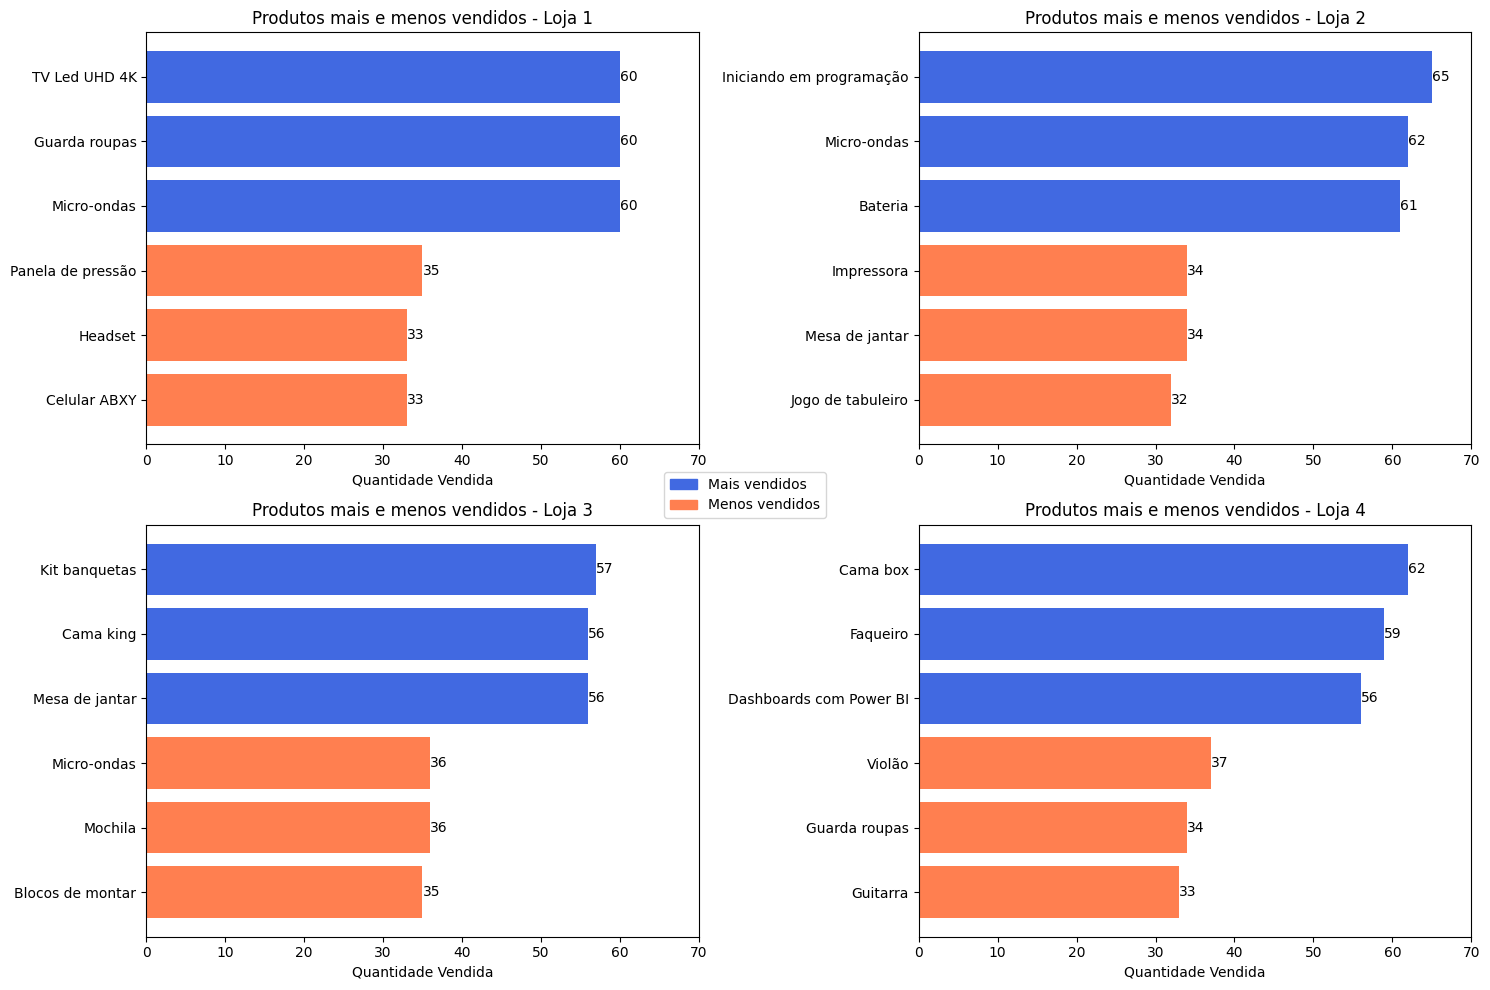

In [42]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches

loja1_product_counts = loja['Produto'].value_counts()
loja2_product_counts = loja2['Produto'].value_counts()
loja3_product_counts = loja3['Produto'].value_counts()
loja4_product_counts = loja4['Produto'].value_counts()

loja1_top_products = loja1_product_counts.head(3)
loja1_bottom_products = loja1_product_counts.tail(3)

loja2_top_products = loja2_product_counts.head(3)
loja2_bottom_products = loja2_product_counts.tail(3)

loja3_top_products = loja3_product_counts.head(3)
loja3_bottom_products = loja3_product_counts.tail(3)

loja4_top_products = loja4_product_counts.head(3)
loja4_bottom_products = loja4_product_counts.tail(3)

plt.figure(figsize=(15, 10))

# Loja 1
plt.subplot(2, 2, 1)
loja1_combined = pd.concat([loja1_top_products, loja1_bottom_products]).sort_values(ascending=True)
colors_loja1 = ['coral'] * 3 + ['royalblue'] * 3
bars_loja1 = plt.barh(loja1_combined.index, loja1_combined.values, color=colors_loja1)
plt.title('Produtos mais e menos vendidos - Loja 1')
plt.xlabel('Quantidade Vendida')
for bar in bars_loja1:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width()}', va='center', ha='left')
plt.xlim(0, 70)


# Loja 2
plt.subplot(2, 2, 2)
loja2_combined = pd.concat([loja2_top_products, loja2_bottom_products]).sort_values(ascending=True)
colors_loja2 = ['coral'] * 3 + ['royalblue'] * 3
bars_loja2 = plt.barh(loja2_combined.index, loja2_combined.values, color=colors_loja2)
plt.title('Produtos mais e menos vendidos - Loja 2')
plt.xlabel('Quantidade Vendida')
for bar in bars_loja2:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width()}', va='center', ha='left')
plt.xlim(0, 70)


# Loja 3
plt.subplot(2, 2, 3)
loja3_combined = pd.concat([loja3_top_products, loja3_bottom_products]).sort_values(ascending=True)
colors_loja3 = ['coral'] * 3 + ['royalblue'] * 3
bars_loja3 = plt.barh(loja3_combined.index, loja3_combined.values, color=colors_loja3)
plt.title('Produtos mais e menos vendidos - Loja 3')
plt.xlabel('Quantidade Vendida')
for bar in bars_loja3:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width()}', va='center', ha='left')
plt.xlim(0, 70)


# Loja 4
plt.subplot(2, 2, 4)
loja4_combined = pd.concat([loja4_top_products, loja4_bottom_products]).sort_values(ascending=True)
colors_loja4 = ['coral'] * 3 + ['royalblue'] * 3
bars_loja4 = plt.barh(loja4_combined.index, loja4_combined.values, color=colors_loja4)
plt.title('Produtos mais e menos vendidos - Loja 4')
plt.xlabel('Quantidade Vendida')
for bar in bars_loja4:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width()}', va='center', ha='left')
plt.xlim(0, 70)

# Adicionando legenda central, comum aos 4 gráficos
blue_patch = mpatches.Patch(color='royalblue', label='Mais vendidos')
royalblue_patch = mpatches.Patch(color='coral', label='Menos vendidos')
plt.figlegend(handles=[blue_patch, royalblue_patch], loc='center')


plt.tight_layout()
plt.show()

# 5. Frete Médio por Loja



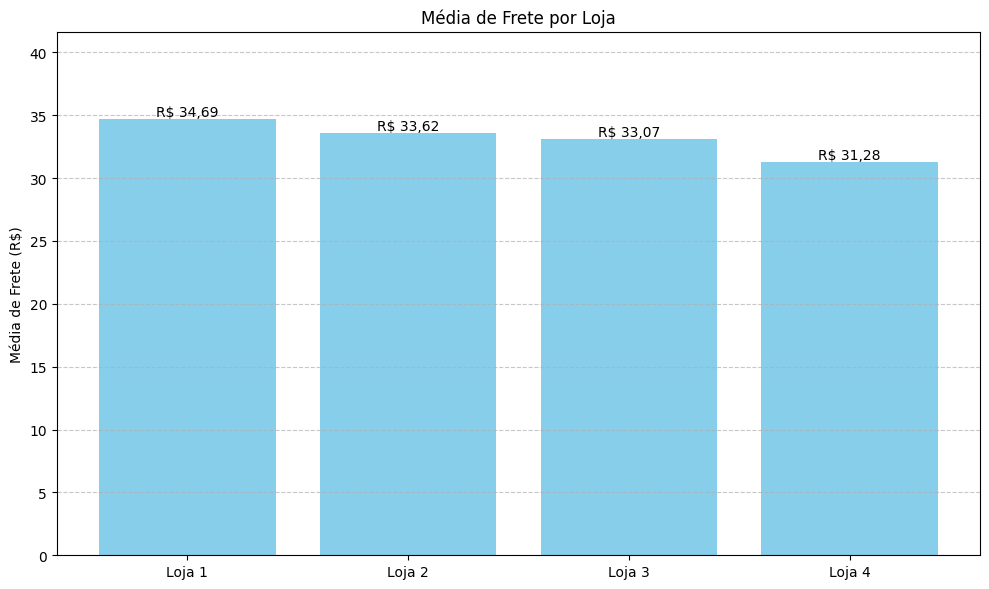

In [43]:
import matplotlib.pyplot as plt
import numpy as np

media_frete_loja1 = loja['Frete'].mean()
media_frete_loja2 = loja2['Frete'].mean()
media_frete_loja3 = loja3['Frete'].mean()
media_frete_loja4 = loja4['Frete'].mean()

media_fretes = {
    'Loja 1': media_frete_loja1,
    'Loja 2': media_frete_loja2,
    'Loja 3': media_frete_loja3,
    'Loja 4': media_frete_loja4
}

lojas = list(media_fretes.keys())
medias = list(media_fretes.values())

plt.figure(figsize=(10, 6))
bars = plt.bar(lojas, medias, color='skyblue')

plt.ylabel('Média de Frete (R$)')
plt.title('Média de Frete por Loja')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Legenda das barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'R$ {yval:.2f}'.replace(".", ","), va='bottom', ha='center')

plt.ylim(0, max(medias) * 1.2)
plt.tight_layout()
plt.show()

# Relatório



Verificado que a loja com menor faturamento é a Loja 4, que apresentou o faturamento de R$ 1.384.497,58.

Contudo, ao visualizar os dados de quantidade de registro de vendas, observa-se que comparado às outras 3 lojas, apenas teve 1 venda a menos, onde as outras lojas tiveram 2359 registros.

Verificado que TODAS as 4 lojas do sr. João venderam consideravelmente bem, e o que evidencia a diferença no faturamento pode estar atrelado a localidade.

Talvez, o que o sr. João precisa é investir no frete mais rápido, para que possa atrair mais vendas, ao invés de simplesmente investir em uma nova loja em outra localidade.

Mas se realmente querer fechar uma das lojas para um novo investimento, como o frete mais rápido, a recomendação é fechar a Loja 4.

# **EXTRA - Gráfico de dispersão para Distribuição de Vendas por Loja**

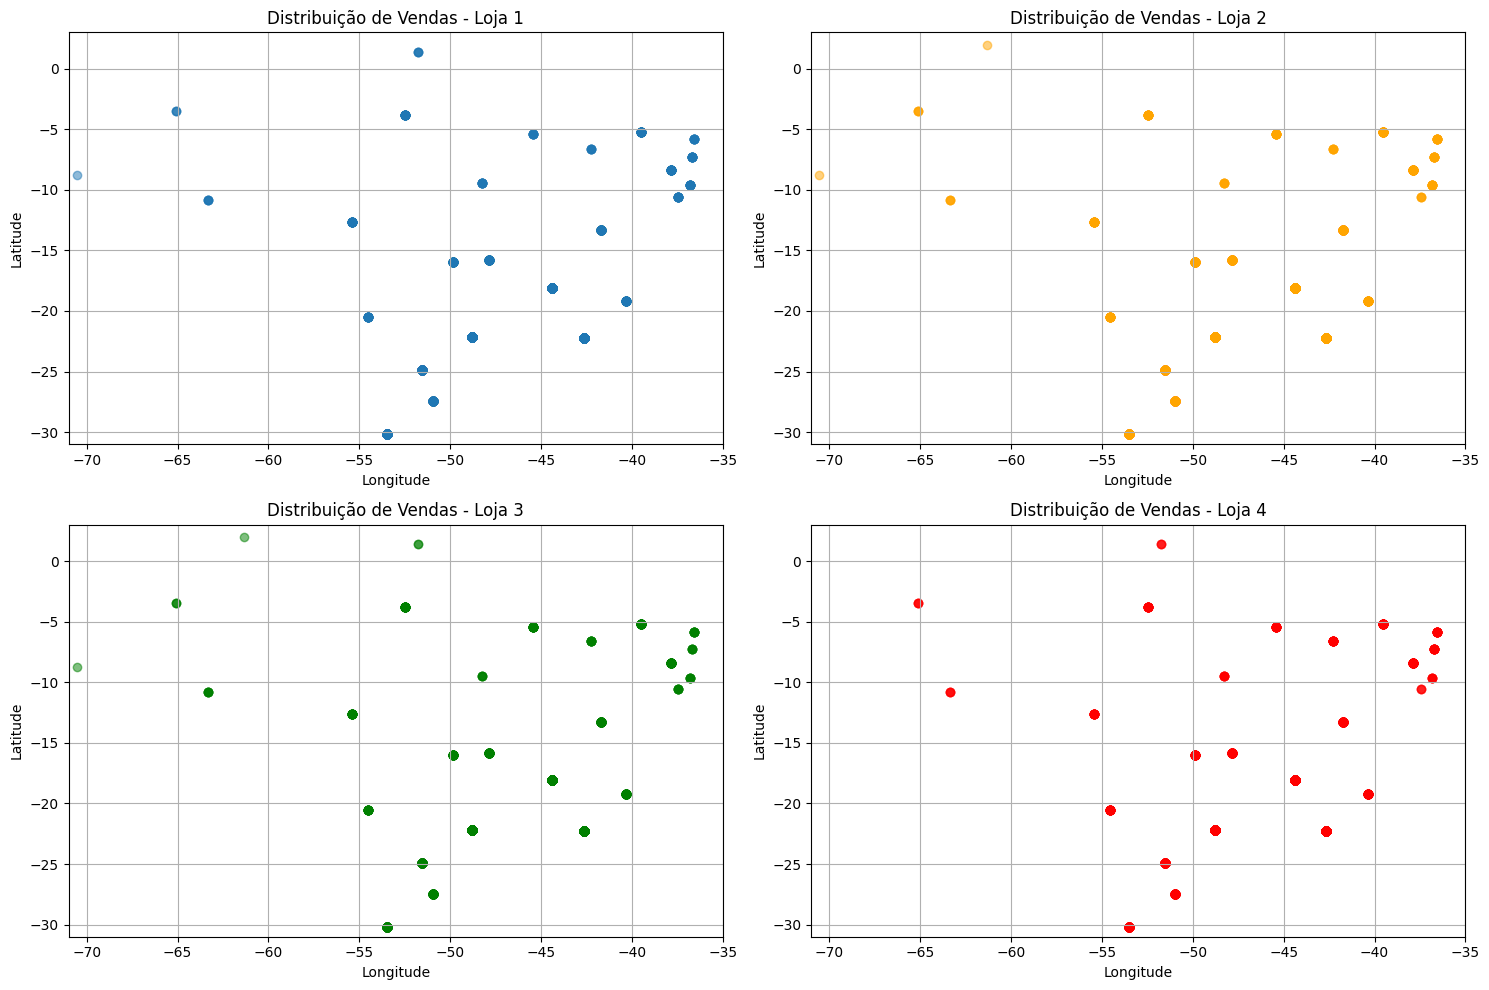

In [61]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))

# Loja 1
plt.subplot(2, 2, 1)
plt.scatter(loja['lon'], loja['lat'], alpha=0.5)
plt.title('Distribuição de Vendas - Loja 1')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.ylim(-31, 3)  # Limites de Latitude
plt.xlim(-71, -35) # Limites de Longitude


# Loja 2
plt.subplot(2, 2, 2)
plt.scatter(loja2['lon'], loja2['lat'], alpha=0.5, color='orange')
plt.title('Distribuição de Vendas - Loja 2')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.ylim(-31, 3)  # Limites de Latitude
plt.xlim(-71, -35) # Limites de Longitude


# Loja 3
plt.subplot(2, 2, 3)
plt.scatter(loja3['lon'], loja3['lat'], alpha=0.5, color='green')
plt.title('Distribuição de Vendas - Loja 3')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.ylim(-31, 3)  # Limites de Latitude
plt.xlim(-71, -35) # Limites de Longitude


# Loja 4
plt.subplot(2, 2, 4)
plt.scatter(loja4['lon'], loja4['lat'], alpha=0.5, color='red')
plt.title('Distribuição de Vendas - Loja 4')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.ylim(-31, 3)  # Limites de Latitude
plt.xlim(-71, -35) # Limites de Longitude

plt.tight_layout()
plt.show()